In [1]:
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"    # this disables GPU when uncommented
from tensorflow.python.client import device_lib
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np
import pydot
import graphviz
import pandas as pd
import seaborn as sns
import csv

In [2]:
tf.random.set_seed(5) # to make sure the experiment is reproducible.

In [3]:
all_ds = pd.read_csv('G:\my drive\machine learning\Cholangiocarcinoma_ML\Data_Files\cc_cancer_mutations.txt', sep='\t')  
all_ds

,cancer_type,ABCA13,ABCA2,ABCA7,ABCC1,ABL1,AC004906.3,AC008738.1,ACAN,ACLY,...,YEATS4,YES1,YY1,ZEB2,ZFHX3,ZNF318,ZNF415,ZNF521,ZNF90,ZRSR2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
376,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Include and use only the mutations with a correlation <> 0 after LASSO regession of the full data set
cols_to_use = ['cancer_type','AXL','BAP1','BRCA1','BRCA2','CTNNB1','DNMT3A','DROSHA','EED','EGFR','EIF1AX','ELF3','ERBB2','ERBB3','ERG','ESR1','FAM46C','FLT4','FOXA1','GATA3','GNA11','GNAS','IDH1','IDH2','INHA','JAK2','JAK3','JUN','KIT','KRAS','MRE11A','PBRM1','PIK3R3','PTPRD','PTPRT','RAD1','RAD52','RNF43','SF3B1','SMAD4','SMARCA4','SMYD3','SPRED1','TERT','TNFAIP3','TP53','U2AF1']
all_ds = all_ds[cols_to_use]
all_ds

,cancer_type,AXL,BAP1,BRCA1,BRCA2,CTNNB1,DNMT3A,DROSHA,EED,EGFR,...,RNF43,SF3B1,SMAD4,SMARCA4,SMYD3,SPRED1,TERT,TNFAIP3,TP53,U2AF1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
375,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
376,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
377,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Randomly shuffle the rows to make sure the data is not sorted
all_ds = all_ds.sample(frac=1)
# Save the data to a local file for other uses
#all_ds.to_csv('G:\my drive\machine learning\Cholangiocarcinoma_ML\Data_Files\cc_cancer_mutations_post_LASSO.csv',index=False)
#all_ds


In [6]:
# Split the data into 70% training and 30% test & validation sets
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.3)

In [7]:
# Split the full data set into training and testing & validation sets
train_dataset, temp_test_dataset =  train_test_split(all_ds, test_size=0.90)
# Split the testing and validation data set created above to be 50% test and 50% validation. 
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.50)

In [8]:
print(f" Train dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

 Train dataset       : (37, 47)
 Test dataset       : (171, 47)
 Validation dataset : (171, 47)


In [9]:
train_labels1 = train_dataset.pop('cancer_type')
test_labels1 = test_dataset.pop('cancer_type')
valid_labels1 = valid_dataset.pop('cancer_type')

In [10]:
# Encode the labeles
train_labels = pd.get_dummies(train_labels1, prefix='Label')
valid_labels = pd.get_dummies(valid_labels1, prefix='Label')
test_labels = pd.get_dummies(test_labels1, prefix='Label')

In [11]:
%%time
# We decalred a function for creating a model.
def build_model():
    model = Sequential()
    model.add(Dense(128, input_shape = (train_dataset.shape[1],)))    # Input layer  {neurons=(# training samples/(5*(# input neurons+ # output neurons))}       
    model.add(Dense(2, activation='sigmoid'))                         # Output layer {must = max number of classes in data set}
     # Activation: sigmoid, softmax, tanh, relu, LeakyReLU. 
     # Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001 # this needs to be adjusted based on the data being learned
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='categorical_crossentropy',#from_logits=True),
                optimizer=optimizer,
                metrics=['accuracy']) # for regression problems, mean squared error (MSE) is often employed
    return model

EPOCHS = 100
batch_size = 5
model = build_model()
print('Here is a summary of this model: ')
model.summary()
#tf.keras.utils.plot_model(model, show_shapes=True, to_file='model_graph.png')
with tf.device('/GPU:0'): # comment the previous line and uncomment this line to train with a GPU, if available.
    history = model.fit(
        train_dataset, 
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS, 
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(train_dataset.shape[0] / batch_size) ,
        validation_data = (valid_dataset, valid_labels),   
    )

Here is a summary of this model: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6016      
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 6,274
Trainable params: 6,274
Non-trainable params: 0
_________________________________________________________________
CPU times: total: 24.5 s
Wall time: 41.2 s


In [12]:
# model training takes about 20s on Matt's PC
#
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,accuracy,val_loss,val_accuracy,epoch
95,0.307161,0.843750,0.527334,0.748538,95
96,0.268885,0.885714,0.527406,0.748538,96
97,0.342780,0.812500,0.527036,0.748538,97
98,0.234898,0.937500,0.526973,0.748538,98
99,0.360038,0.781250,0.526850,0.748538,99


In [13]:
example_batch = test_dataset[:10]
example_result = model.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([[0.6067942 , 0.37542927],
       [0.5696966 , 0.41546994],
       [0.57570446, 0.42660886],
       [0.67818093, 0.31961817],
       [0.66048396, 0.27931112],
       [0.6258293 , 0.3683688 ],
       [0.6067942 , 0.37542927],
       [0.7056016 , 0.2751155 ],
       [0.6279644 , 0.27911857],
       [0.57570446, 0.42660886]], dtype=float32)

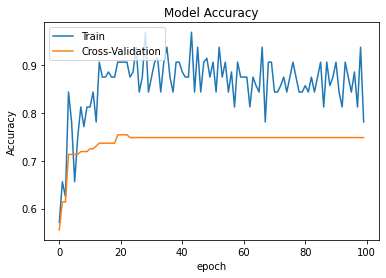

In [14]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

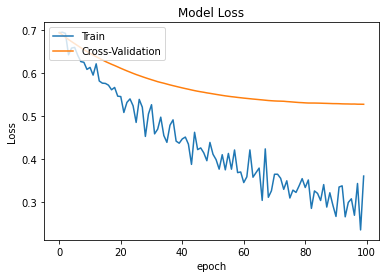

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

In [16]:
print('Train Split: ')
loss, accuracy = model.evaluate(train_dataset, train_labels, verbose=1)

print("Accuracy   : {:5.2f} ".format(accuracy))

Train Split: 
2/2 [==============================] - 0s 2ms/step - loss: 0.2890 - accuracy: 0.8919
Accuracy   :  0.89 


In [17]:
print('Evaluation Split: ')
loss, accuracy =  model.evaluate(valid_dataset, valid_labels, verbose=2)

print("Accuracy   : {:5.2f} ".format(accuracy))

Evaluation Split: 
6/6 - 0s - loss: 0.5269 - accuracy: 0.7485 - 27ms/epoch - 5ms/step
Accuracy   :  0.75 


In [18]:
print('Test Split: ')
loss, accuracy =  model.evaluate(test_dataset, test_labels, verbose=2)

print("Accuracy   : {:5.2f}".format(accuracy))

Test Split: 
6/6 - 0s - loss: 0.5409 - accuracy: 0.7135 - 24ms/epoch - 4ms/step
Accuracy   :  0.71


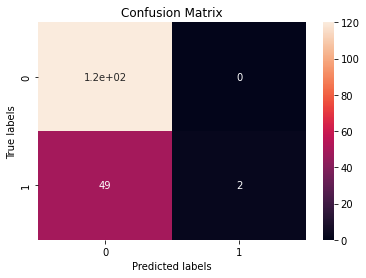

In [19]:
# import seaborn as sns
# import matplotlib.pyplot as plt     
from sklearn.metrics import confusion_matrix
ax= plt.subplot()
predict_results = model.predict(test_dataset)
# predict_results = (predict_results.argmax())
predict_results= predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

In [20]:
# This is a known Extrahepatic CC sample
sample = np.array([[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])
print(model.predict(sample))

[[0.6209243  0.29281834]]


In [21]:
# This is a known Intrahepatic CC sample
sample = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
print(model.predict(sample))

[[0.80674374 0.18480965]]
